<a href="https://colab.research.google.com/github/smurillo1/analise_walmart/blob/main/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Walmart 

# Questão do negócio

O intuito desta análise é fazer um levantamento do faturamento das unidades do Walmart nos EUA afim de definir qual a melhor loja para expandir seu tamanho. 

Para isso, foi fornecido um dataset com algumas informações sobre o faturamento de cada unidade. A partir da análise dessas informações será refinado um padrão para tomada de decisão de qual a melhor unidade para se realizar uma expansão.



---



# Entendimento do negócio

O Walmart é uma multinacional estadunidense de lojas de departamento. A companhia foi eleita a maior multinacional de 2010. A sede da Wal-Mart fica em Bentonville, Arkansas. Walmart é a maior loja de varejo dos Estados Unidos, sendo este varejo o range do seu negócio.

Abaixo, estão apresentados os dados fornecidos para realização da análise:

- Store: Número da loja;
- Date: Semana de venda;
- Weekly_Sales: Vendas naquela semana;
- Holiday_Flag:  (1 - Semana com feriado, 0 - Semana sem feriado);
- Temperature: Temperatura em °F;
- Fuel_Price: Preço do combustível na região da loja;
- CPI: Índice de preços ao consumidor;
- Unemployment: Taxa de desemprego.


In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#lendo dataset
df = pd.read_csv('/content/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Acima, é possível observar os dados fornecidos em nosso dataset. De antemão os mesmos parecem fazer sentido, inicialmente suspeito da relação com a temperatura e o número de vendas.

Os dados em si não apresentam solução direta e precisam passar pelo processo de refinamento para chegarmos ao objetivo desta análise.

---



# Coletando dados

Abaixo, estão presentes os dados disponíveis, assim como seus respectivos formatos, a priori os dados estão próximo do ideal para esta análise com exceção da coluna *'Date'* que se apresenta como objeto. Após alteração do formato, partir da mesma, podemos obter as colunas de Mês, Ano e Período (mês + ano), as quais nos ajudarão a realizar a análise por períodos bem definidos.



---




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Tratando dados

Foi realizada a alteração do formato da coluna 'Date' de objeto para data, assim como inserida as colunas de Mês, Ano e Período (mês + ano). Devido a não presença de elementos nulos, não foi preciso realizar a extração dos mesmos. Após isso, foi verificado a presença de outliers e caso necessário também tratados.

In [ ]:
#alterando formato da data
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

#alterando formato das demais variáveis
data_types_dict = {'Store':str,'Holiday_Flag':'category'}
df = df.astype(data_types_dict)

#inserção das colunas
df['Mes'] = df['Date'].dt.strftime('%m')
df['Ano'] = df['Date'].dt.strftime('%Y')
df['Periodo'] = df['Date'].dt.strftime('%m-%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Mes           6435 non-null   object        
 9   Ano           6435 non-null   object        
 10  Periodo       6435 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(5), object(4)
memory usage: 509.3+ KB


Este foi o resultado após inserir as novas colunas e alterar o formato da coluna *'Date'*. Abaixo podemos observar o nosso dataset com a aplicação das alterações.

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Mes,Ano,Periodo
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,02,2010,02-2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,02,2010,02-2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,02,2010,02-2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,02,2010,02-2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,03,2010,03-2010


Agora chegou o momento de examinar as características estatísticas das nossas variáveis afim de detectar possíveis *outliers*.

In [ ]:
df.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


Acima, podemos observar o indício da presença de outliers que elevam a média na coluna *'Weekly_Sales'*, estes outliers podem ser ocasionados a partir de um aumento de vendas em datas 'especiais' ou feriados, como período de ação de graças, ou mesmo, o Super Bowl. Sendo assim, não realizarei remoção dos mesmos pois tenho o intuito de utilizarmos como critério de decisão.

De imediato suspeitei, também, da coluna *'Temperature'*, porém após pesquisas, obtive o conhecimento de que por estarem em *Fahrenheit*, os números estão dentro de um intervalo aceitável.

Os demais dados parecem bem coerentes e assim posso me sentir a vontade para utilizar tanto valores de média quanto de mediana.

# Visualização dos dados


Inicialmente, foi observado o comportamento das vendas por mês entre os anos disponibilizados no dataset. A partir disso pode-se perceber que há uma semelhança entre o valor das vendas por mês e em anos diferentes. 

Após isso, foi traçado um gráfico de linha expondo o comportamento já citado, porém, utilizando a média de vendas mensal.


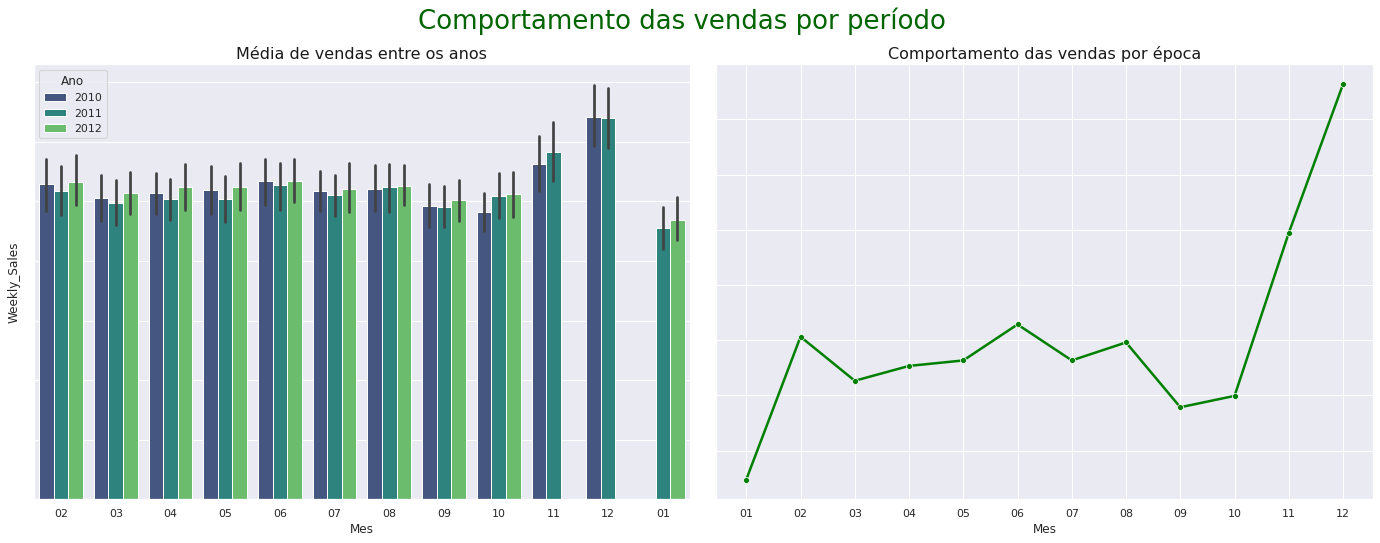

In [ ]:
#agrupando vendas por mes
vendas = df.groupby(df['Mes']).Weekly_Sales.mean()
vendas = vendas.reset_index()

#definir região de plotagem
sns.set()
fig, axes = plt.subplots(1, 2, figsize=(24,8))
fig.subplots_adjust(wspace=0.04) #espaçamento entre gráficos

#titulo
fig.suptitle('Comportamento das vendas por período', fontsize=26, color='#006400')

#criando gráficos

#grafico de barras
sns.barplot(data=df, x='Mes', y='Weekly_Sales',hue='Ano', palette='viridis', ax=axes[0])
axes[0].set_title('Média de vendas entre os anos',fontsize=16, color='k');
axes[0].set(yticklabels=[])
#gráfico de linha
sns.lineplot(data=vendas, x='Mes', y ='Weekly_Sales', color='green', linewidth=2.5, marker='o', palette='viridis', ax=axes[1]);
axes[1].set_title('Comportamento das vendas por época',fontsize=16, color='k');
axes[1].set(yticklabels=[]);
axes[1].set_ylabel("");

A partir dos gráficos acima, conclui-se que há um forte volume de vendas com a chegada do fim do ano (devido à presença de datas comemorativas) e uma forte queda no mês de janeiro, após isso o comportamento é de estabilidade com algumas oscilações. 

Resolvi restringir o dataset para as unidades que mais lucraram de acordo com os dados fornecidos. Acredito que uma expansão pode beneficiar unidades com volume de vendas maior, pois possibilita o aumento de fluxo de clientes, juntamente com aumento de estruturas como estoque, mostruário e oferta de maior variedade de produtos (caso seja do interesse da empresa). 

Foram selecionadas 10 unidades, ordenadas pelo número de vendas (do maior para o menor), onde será criado um **critério de decisão** da expansão de uma das unidades.

In [ ]:
#criando dataframe com as medias das variáveis
df_medias = df.groupby(df['Store']).mean().reset_index().sort_values(by='Weekly_Sales', ascending=False).head(10)
df_medias

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
12,20,2.107677e+06,55.451399,3.417608,209.038131,7.371413
33,4,2.094713e+06,62.253357,3.216972,128.679669,5.964692
5,14,2.020978e+06,57.790979,3.417608,186.285678,8.648748
4,13,2.003620e+06,53.697133,3.286147,128.679669,7.001825
11,2,1.925751e+06,68.216364,3.219699,215.646311,7.623846
1,10,1.899425e+06,72.241189,3.575923,128.679669,8.362965
19,27,1.775216e+06,57.311119,3.578294,139.011284,8.001748
41,6,1.564728e+06,69.700000,3.219699,217.553197,6.606902
0,1,1.555264e+06,68.306783,3.219699,215.996892,7.610420
32,39,1.450668e+06,70.597343,3.219699,214.729069,7.869049


Vendo que a loja que mais lucrou ao decorrer do tempo foi a loja 20, é importante observar quantas vezes ela atingiu a média de vendas por mês. Como pôde-se observar no gráfico de "Média de vendas entre os anos" apresentado anteriormente, há um equilíbrio de vendas entre os meses no decorrer dos anos, sendo assim, a média apresentada no gráfico abaixo será a média realizada entre os anos apresentados, de modo que possámos avaliar por período mensal.

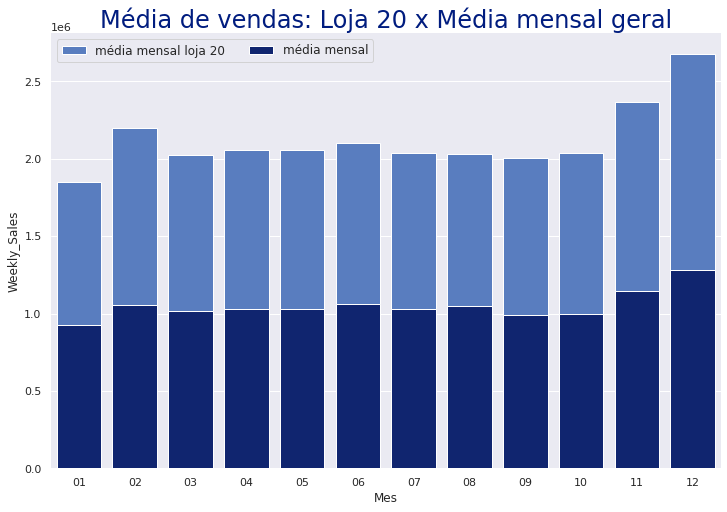

In [ ]:
#definindo loja com maior venda
maior_venda = df.loc[(df['Store'].str.contains('20'))]
media_loja20 = maior_venda.groupby(maior_venda['Mes']).Weekly_Sales.mean().reset_index()

#plotando gráfico
f, ax = plt.subplots(figsize = (12,8))
plt.title('Média de vendas: Loja 20 x Média mensal geral',fontsize=24, color='b')
sns.set_color_codes("muted")
sns.barplot(x='Mes', y='Weekly_Sales', data=media_loja20,
            label = 'média mensal loja 20', color = 'b', edgecolor = 'w')
sns.set_color_codes('dark')
sns.barplot(x = 'Mes', y = 'Weekly_Sales', data = vendas,
            label = 'média mensal', color = 'b')
ax.legend(ncol = 2, loc = 'upper left', fontsize=12)
sns.despine(left = True, bottom = True)
plt.show()

Acima, vemos que a loja 20 ultrapassou a média em todos os meses e em consequência a seu alto volume de vendas a média de vendas do Walmart aumenta.

Separei um dataset com as informações apenas das filiais dentro do intervalo já destacado. O mesmo será utilizado para a plotagem de gráficos dentro deste intervalo.

In [ ]:
#criando dataframe com as lojas que mais vendem
recomendados = df['Store'].isin(['1','2','4','6','10','13','14','20','27','39'])
recomendados = df[recomendados]
recomendados

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Mes,Ano,Periodo
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,02,2010,02-2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,02,2010,02-2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,02,2010,02-2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,02,2010,02-2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,03,2010,03-2010
...,...,...,...,...,...,...,...,...,...,...,...
5572,39,2012-09-28,1495607.07,0,78.04,3.666,221.655600,6.623,09,2012,09-2012
5573,39,2012-10-05,1574408.67,0,72.05,3.617,221.853340,6.228,10,2012,10-2012
5574,39,2012-10-12,1494417.07,0,69.88,3.601,222.051079,6.228,10,2012,10-2012
5575,39,2012-10-19,1577486.33,0,71.45,3.594,222.095172,6.228,10,2012,10-2012


Foi plotado um boxplot com intuito de investigar se o valor das vendas realizadas se dá por outliers, ou se apresenta uma média de valores coerente com o apresentado no momento em que os dados foram agrupados.



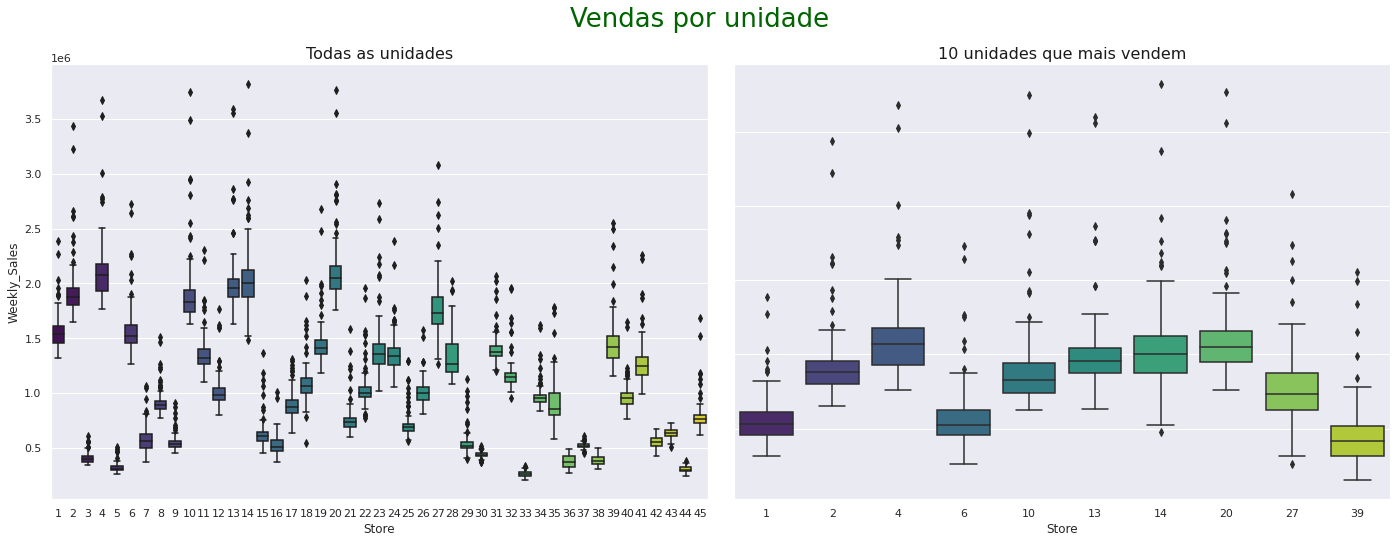

In [ ]:
#definindo figura
sns.set()
fig, axes = plt.subplots(1, 2, figsize=(24,8))
fig.subplots_adjust(wspace=0.04) #espaçamento entre gráficos

#titulo
fig.suptitle('Vendas por unidade', fontsize=26, color='#006400')

#inserindo os boxplots
sns.boxplot(data=df, x='Store', y='Weekly_Sales', palette='viridis', ax=axes[0]);
axes[0].set_title('Todas as unidades',fontsize=16, color='k');

sns.boxplot(data=recomendados, x='Store', y='Weekly_Sales', palette='viridis', ax=axes[1]);
axes[1].set_title('10 unidades que mais vendem',fontsize=16, color='k');
axes[1].set_ylabel("");
axes[1].set(yticklabels=[]);

Algumas conclusões podem ser tiradas dos boxplots acima:

Tomando como verdadeira a informação de que o índice de outliers positivos se dá devido a datas comemorativas, pode-se afirmar que este comportamento se faz presente quase que de forma unânime. No entanto, algumas unidades (36,38,42,43,44) não apresentam esse comportamento, nos permitindo de cara descartar uma expansão em suas unidades, pois, além de não apresentar esses outliers, as mesmoas apresentam baixo indice de vendas.

Para melhor observar, separei um boxplot com as 10 unidades que mais lucram, o intuito aqui é observar se o comportamento entre elas possui o mesmo padrão. O que pode-se concluir sobre é que a filial 20 possui o maior lucro ao decorrer dos anos, porém, quando retiramos os outliers e observamos apenas as medianas, vemos que a unidade 4 apresentam uma maior solidez, passando a ser a mais lucrativa. 

Analisando demais informações fornecidas que podem influenciar no critério de decisão.


Inicialmente será aplicada a correlação entre as variáveis fornecidas com intuito de observar se existem dados que podem influenciar no número de vendas.

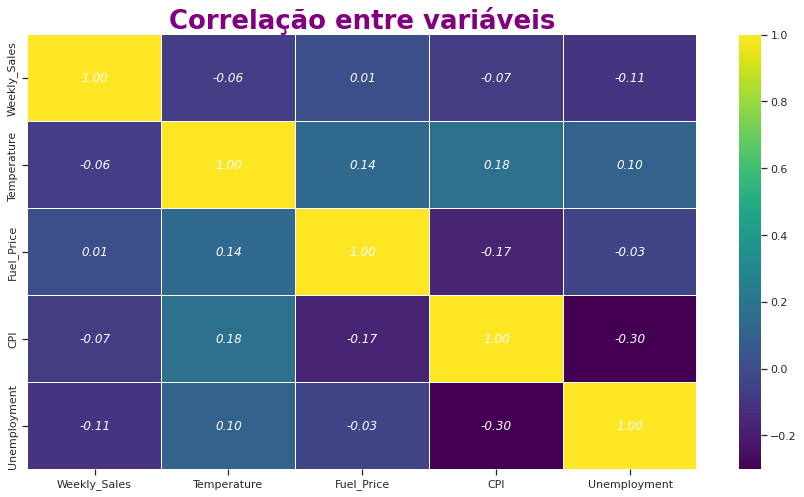

In [ ]:
#Estabelecendo correlação entre variáveis contínuas
annot_kws={'fontsize':12, 
           'fontstyle':'italic',  
           'color':"w",
           'alpha':1,
           'horizontalalignment':'center'}

sns.set(rc={'figure.figsize':(15,8), 'figure.facecolor':'white'})
sns.set_style("ticks")
plt.title('Correlação entre variáveis', fontsize=26, fontweight='bold',color='purple');

new_df = df
#utlizando variaveis contínuas para realizar a correlação de Pearson (r)
sns.heatmap(new_df.corr(),annot=True, annot_kws = annot_kws, fmt='.2f', linewidth=.5, cmap='viridis');

Destancando a coluna "Weekly_Sales" nota-se que não há forte correlação entre as demais variáveis para com ela. Vamos que a taxa de desemprego se correlaciona negativamente com a mesma - apresentando uma relação levemente inversamente proporcional quando pensamos que quanto maior o número de vendas, menor o índice de desemprego.

Decidi, então, utilizar os demais dados como auxílio para o critério de decisão, por isso vou observá-los apenas nas unidades em que já destaquei devido ao acúmulo de lucro no decorrer dos anos.


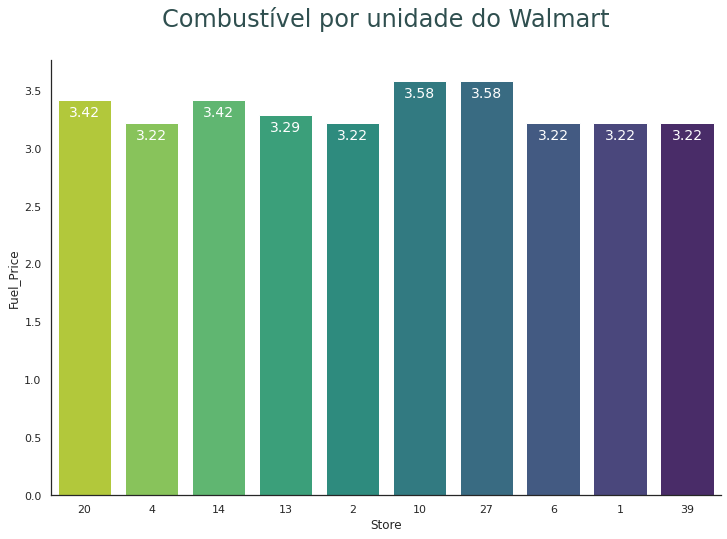

In [ ]:
#inserindo figura
plt.figure(figsize=(12,8))
sns.set_style('white')
graf1 = sns.barplot(data=df_medias, x='Store', y='Fuel_Price', palette='viridis_r');

plt.title('Combustível por unidade do Walmart\n',fontsize=24, color='#2F4F4F')
sns.despine()
#ajustando rótulos
for i in graf1.patches:
  h = i.get_height()
  graf1.annotate('{:.2f}'.format(h), 
                (i.get_x() + i.get_width()/2, i.get_height()-0.15),
                ha='center',va='baseline', rotation=0, fontsize=14, xytext=(0, 1),
                color = 'w', textcoords='offset points')

Sobre a gasolina, observa-se que há uma oscilação de 0.36 entre algumas regiões, o que pode se mostrar como um valor considerável quando diz respeito ao preço do combustível. As unidades 10 e 27 se destacam por possuírem a maior alta, já metade das unidades (4, 2, 6, 1, 39) possuem o preço mínimo. O que pode ser bom quando pensa-se em expandir e realizar um maior fluxo de abastecimento na unidade.

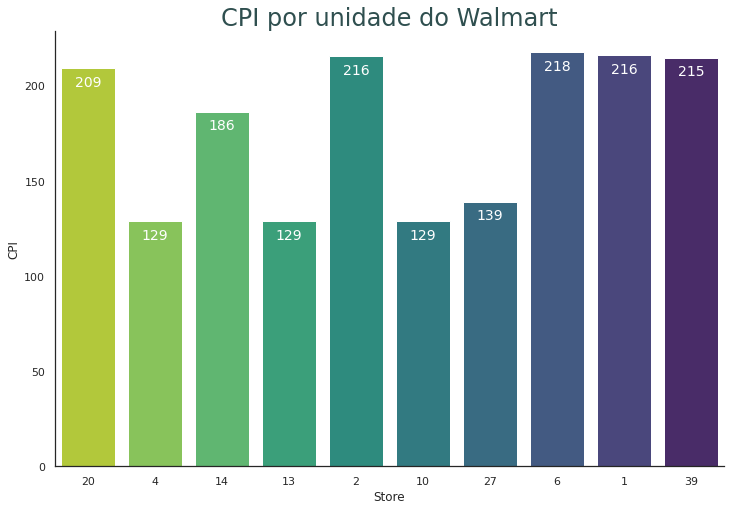

In [ ]:
#inserindo figura
plt.figure(figsize=(12,8))
sns.set_style('white')

graf = sns.barplot(data=df_medias, x='Store', y='CPI', palette='viridis_r');
plt.title('CPI por unidade do Walmart',fontsize=24, color='#2F4F4F')
sns.despine()

#ajustando rótulos
for i in graf.patches:
  h = i.get_height()
  graf.annotate('{:.0f}'.format(h), 
                (i.get_x() + i.get_width()/2, i.get_height()-10),
                ha='center',va='baseline', rotation=0, fontsize=14, xytext=(0, 1),
                color = 'w', textcoords='offset points')

Um dado interessante que podemos retirar deste gráfico de barras é que duas das unidades que mais lucraram (4 e 13) apresentam um CPI (índice de Preços ao Consumidor) mais baixo do que o de filiais com lucro semelhante (20 e 14) ou menor (6, 1 e 39). Sendo assim, é de se concluir que naquelas unidades há um maior volume de vendas, já que os preços tendem a ser menores, mas os ganhos equiparados a unidades com CPI mais elevado, onde os produtos tendem a se valorizar mais.

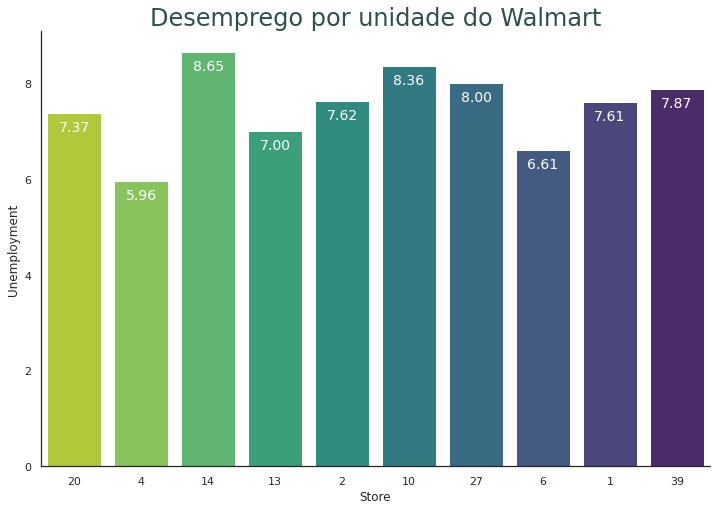

In [ ]:
#inserindo figura
plt.figure(figsize=(12,8))
sns.set_style('white')

graf = sns.barplot(data=df_medias, x='Store', y='Unemployment', palette='viridis_r');
plt.title('Desemprego por unidade do Walmart',fontsize=24, color='#2F4F4F')
sns.despine()

#inserindo rótulos
for i in graf.patches:
  h = i.get_height()
  graf.annotate('{:.2f}'.format(h), 
                (i.get_x() + i.get_width()/2, i.get_height()-0.4),
                ha='center',va='baseline', rotation=0, fontsize=14, xytext=(0, 1),
                color = 'w', textcoords='offset points')

O destaque nessa relação entre desemprego e unidade vai para a filial 4, pois apresenta uma taxa de desemprego bem menor do que as demais.

Vale salientar que além dos dados apresentados acima, a temperatura pra mim foi uma variável que não fez muito sentido quando tratamos apenas com o banco disponibilizado, talvez com algum aditivo de informação (o que não é o objetivo deste relatório) a variável faria mais sentido.

In [ ]:
#agrupando vendas 
feriado = df.groupby(df['Holiday_Flag']).Weekly_Sales.sum().reset_index()
feriado

,Holiday_Flag,Weekly_Sales
0,0,6.231919e+09
1,1,5.052996e+08


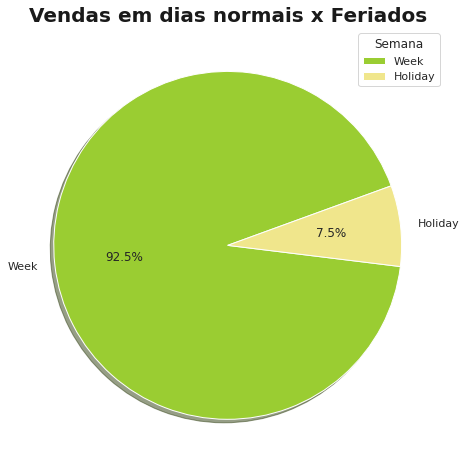

In [ ]:
#criando gráfico de pizza 
mylabel = ['Week', 'Holiday']
mycolors = ['#9ACD32', '#F0E68C']

plt.title('Vendas em dias normais x Feriados', fontsize=20, fontweight='bold',color='k');
plt.pie(feriado['Weekly_Sales'], labels = mylabel, colors = mycolors, autopct='%1.1f%%', shadow=True, startangle=380);
plt.legend(title='Semana');


Através do gráfico acima podemos ver que 7.5% das vendas do Walmart são realizadas em datas especiais e ter um bom volume de vendas durante essas datas é importante pra definir qual das unidades irá ser expandida. Para isso, vamos observar o dataset com apenas com vendas em feriados e selecionar as que mais vendem.

In [ ]:
#criando dataframe apenas com vendas em feriados
holiday_df = df.loc[(df['Holiday_Flag']==1)]
holiday_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Mes,Ano,Periodo
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,02,2010,02-2010
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,09,2010,09-2010
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,11,2010,11-2010
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,12,2010,12-2010
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,02,2011,02-2011
...,...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,09,2011,09-2011
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,11,2011,11-2011
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,12,2011,12-2011
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424,02,2012,02-2012


Após isso, foi selecionado o ranking das 10 lojas que mais venderam em datas especiais.

In [ ]:
#dataframe com top 10 lojas que mais venderam em feriados
holiday_10 = holiday_df.groupby(holiday_df['Store']).Weekly_Sales.mean().sort_values(ascending=False).head(10).reset_index()
holiday_10

,Store,Weekly_Sales
0,20,2249035.081
1,4,2243102.624
2,14,2120582.998
3,10,2113755.949
4,13,2113043.806
5,2,2079266.900
6,27,1892299.278
7,6,1680907.927
8,1,1665747.656
9,19,1577046.734


## Comparando o ranking de vendas em feriados com o ranking de vendas em dias normais.

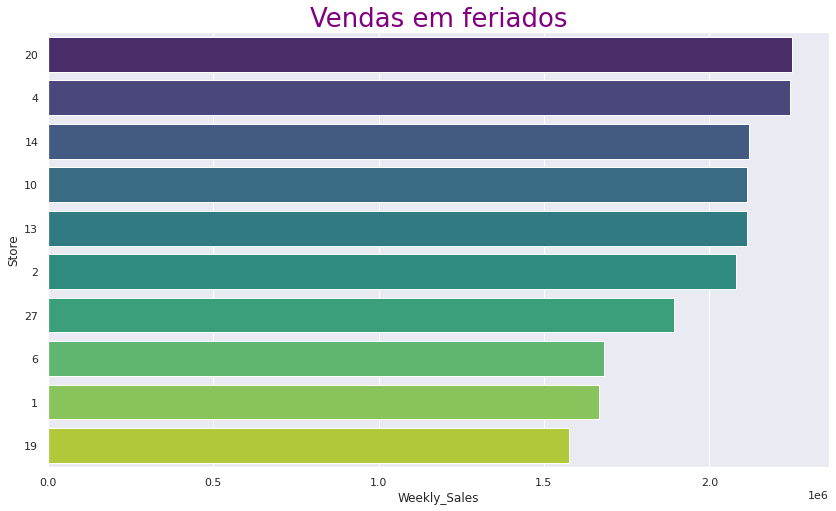

In [ ]:
#inserindo gráfico
plt.figure(figsize=(14,8))
plt.title('Vendas em feriados', fontsize=26, color='purple')
sns.barplot(data=holiday_10, y='Store', x='Weekly_Sales', orient='h', palette='viridis');

Pode-se observar que o volume de vendas em dias normais se espelha nas mesmas filiais quando se diz respeito a vendas em feriados.

# Critério de decisão

Após realizar a análise das métricas presentes, sugiro uma expansão da unidade que atende melhor os critérios estabelecidos abaixo:

- Melhor média de vendas (Weekly_Sales): Lojas 4 e 20;
- Melhor média de vendas em feriados: Lojas 4 e 20;
- Menor CPI: Lojas 4, 13 e 10;
- Menor taxa de desemprego: Lojas 4 e 6;
- Menor preço do combustível (Fuel_Price): Lojas 4, 2, 6, 1 e 39.

Tendo a loja 4 como mais lucrativa no decorrer dos anos (junto com a unidade 20) e avaliando os critérios já estabelecidos, minha sugestão é realizar a expansão na loja número 4 devido ao custobenefício apresentado e a presença da unidade em todos os pré-requisitos apresentados.

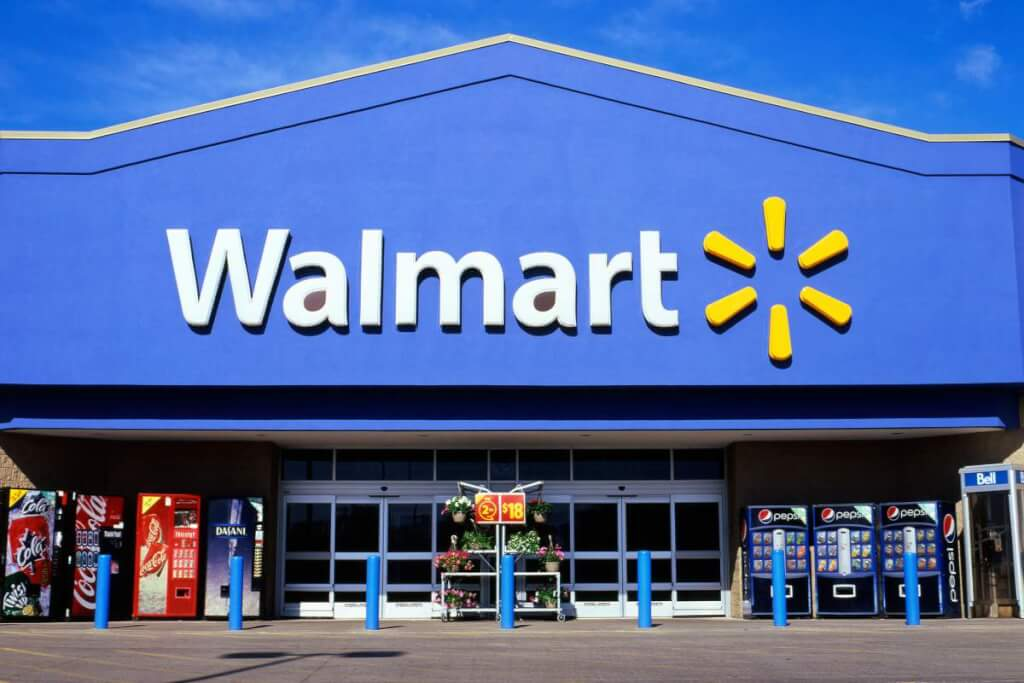
